# Упражнения на численное интегрирование обыкновенных дифференциальных уравнений

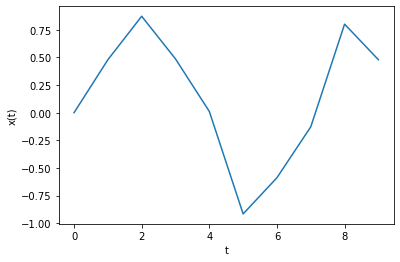

In [1]:
from math import sin
from numpy import arange
from pylab import plot,xlabel,ylabel,show

def f(x,t):
    return -x**3 + sin(t)

a = 0.0
b = 10.0
N = 10
h = (b-a)/N

tpoints = arange(a,b,h)
xpoints = []

x = 0.0
for t in tpoints:
    xpoints.append(x)
    k1 = h*f(x,t)
    k2 = h*f(x+0.5*k1,t+0.5*h)
    x += k2

plot(tpoints,xpoints)
xlabel("t")
ylabel("x(t)")
show()

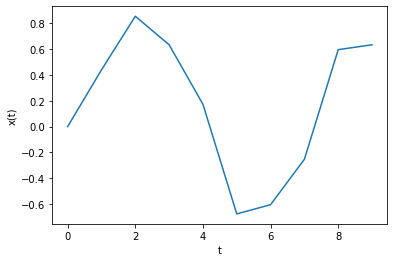

In [2]:
from math import sin
from numpy import arange
from pylab import plot,xlabel,ylabel,show

def f(x,t):
    return -x**3 + sin(t)

a = 0.0
b = 10.0
N = 10
h = (b-a)/N

tpoints = arange(a,b,h)
xpoints = []
x = 0.0

for t in tpoints:
    xpoints.append(x)
    k1 = h*f(x,t)
    k2 = h*f(x+0.5*k1,t+0.5*h)
    k3 = h*f(x+0.5*k2,t+0.5*h)
    k4 = h*f(x+k3,t+h)
    x += (k1+2*k2+2*k3+k4)/6

plot(tpoints,xpoints)
xlabel("t")
ylabel("x(t)")
show()

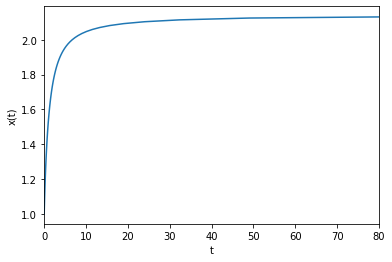

In [3]:
from numpy import arange
from pylab import plot,xlabel,ylabel,xlim,show

def g(x,u):
    return 1/(x**2*(1-u)**2+u**2)

a = 0.0
b = 1.0
N = 100
h = (b-a)/N

upoints = arange(a,b,h)
tpoints = []
xpoints = []

x = 1.0
for u in upoints:
    tpoints.append(u/(1-u))
    xpoints.append(x)
    k1 = h*g(x,u)
    k2 = h*g(x+0.5*k1,u+0.5*h)
    k3 = h*g(x+0.5*k2,u+0.5*h)
    k4 = h*g(x+k3,u+h)
    x += (k1+2*k2+2*k3+k4)/6

plot(tpoints,xpoints)
xlim(0,80)
xlabel("t")
ylabel("x(t)")
show()

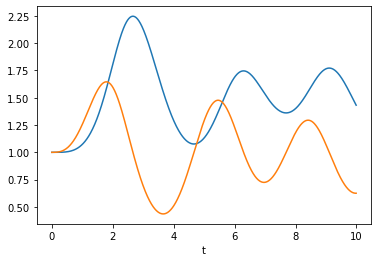

In [4]:
from math import sin
from numpy import array,arange
from pylab import plot,xlabel,show

def f(r,t):
    x = r[0]
    y = r[1]
    fx = x*y - x
    fy = y - x*y + sin(t)**2
    return array([fx,fy],float)

a = 0.0
b = 10.0
N = 1000
h = (b-a)/N

tpoints = arange(a,b,h)
xpoints = []
ypoints = []

r = array([1.0,1.0],float)
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6
plot(tpoints,xpoints)
plot(tpoints,ypoints)
xlabel("t")
show()

In [ ]:
from numpy import linspace
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def f(x, t, delta, omega):
    return [x[1], -2*delta*x[1] - omega**2*x[0]]

a = 0.
b = 10.
N = 501
delta = 0.1
omega = 2.
t = linspace(a,b,N)
sol = odeint(f, [2,1], t, args=(delta, omega))
plt.plot(sol[:, 0], sol[:, 1])
plt.legend(loc='best')
plt.xlabel('theta(t)')
plt.ylabel('omega(t)')
plt.grid()
plt.show()

## 1. Фильтр нижних частот (a low-pass filter)

Простейшая электрическая цепь, содержащая резистор и конденсатор, является фильтром низких частот: сигнал подается на левую часть фильтра, а с правой снимается отфильтрованный выход.

![Фильтр нижних частот](http://avr-start.ru/wp-content/uploads/2013/06/a5-6.png)

Полагаем, что у нагрузки очень высокое сопротивление, тогда на нагузку  отвлетвяется очень малый ток. Пусть $I$ - сила тока, текущего через резистор $R$, заряд конденсатора $q$, а его емкость $C$, тогда:

$$ IR = U_{in} - U_{out}, \quad q = CU_{out}, \quad I = \frac{dq}{dt}.$$

Такая задача сводится к дифференциальному уравнению:

$$\frac{dU_{out}}{dt} = \frac{1}{RC}\left( U_{in} - U_{out} \right).$$

1. Напишите программу для решения диф. уравнения для $U_{out}$, используя метод Рунге-Кутта 4-го порядка.
2. В качестве входного сигнала используйте импульсы с частотой равной 1 и амплитудой равной 1: $ U_{in} = \pm 1.$
3. Постройте графики $U_{out}(t)$ в диапозоне $0 < t < 10$, при $\tau = RC = 0.01, 0.1, 1$ с начальным условием $U_{out}(0) = 0$.
4. Используйте различные величины для шага по времени $h$, мелкий шаг дает более точный результат, но требует больше времени расчета.
5. На основении полученных графиков, поясните с физической точки зрения как работает фильтр нижних частот.

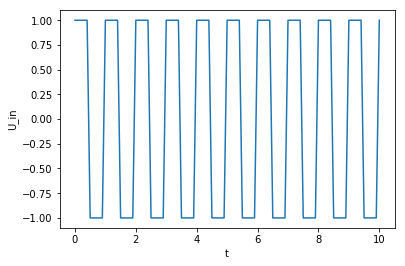

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def Uin(t):
    res = -1
    if (int)(2*t)%2 == 0:
        res = 1
    return res

N = 101
time = np.linspace(0,10,N)
U = np.empty(N, float)
for i in range(N):
    U[i]=Uin(time[i])

plt.plot(time,U)
plt.xlabel('t')
plt.ylabel('U_in')
plt.show()    

## 2. Нелинейный маятник

При отклонении математического маятника на угол, значительно превосходящий $5^{\circ} - 6^{\circ}$ град. уравнение движения является нелинейным дифференциальным уравнением:

$$ \frac{d^2 \theta}{dt^2} = -\frac{g}{l} \sin \theta.$$

Уравнение второго порядка сводится к системе уравнений первого порядка:

$$ \frac{d \theta}{dt} = \omega, \quad \frac{d \omega}{dt} = -\frac{g}{l} \sin \theta.$$

1. Напишите программу для решения систему уравнений, описывающих колебания *нелинейного* маятника, полагая l = 10 см.
2. Проведените расчет угла отклонения маятника от вертикали $\theta$ для нескольких периодов колебаний, если в начальный момент времени угол отклонения составяет $\theta_0 = 179^{\circ}$.
3. Постройте график $\theta(t)$.
4. Создайте анимацию колебаний маятника. Подберите подходящую скорость для ототбражения колебаний.

## 3. Вынужденные колебания маятника

Под дейсвтвием горизонтальной периодической внешней силы маятник совершает колебания по закону:

$$ \frac{d^2 \theta}{dt^2} = -\frac{g}{l} \sin \theta + C\cos\theta \sin \Omega t$$

1. Напишите программу для решения этого уравнения при $l = 10 cm, C = 2 s^{-2}, \Omega = 5 s^{-1}$ на отрезке $0<t<100 s$ с нулевыми начальными условиями для смещения и скорости.
2. Измените $\Omega$ при постоянном $C$/